# Applying K-means for image color compression

---
#### Overview:
Objective: Use K-means to group the colors in a tulip photo. By changing the number of groups/centroids (*k*), we can see how this affects the image’s overall look.

**Part 1:** Data Loading and Exploration

**Part 2:** Model Building and Evaluation
- Model Training, Image Evaluations
  - *k* = 1
  - *k* = 3
  - *k* = 2 through 10

---

### **Change Log**

Date | Author | Version | Change Desc
--- | --- | --- | ---
2022_0316 | S. Souto | v1 | Initial Version
2024_0502 | S. Souto | v2 | Updated format to match portfolio format

---

### **Data Sources**

1. Original data: image: "using_kmeans_for_color_compression_tulips_photo.jpg"

### **Notebook Setup**

In [1]:
# Import packages and libraries
import numpy as np
import pandas as pd

# Packages for visualizations
%pylab inline
import plotly.graph_objects as go

# Packages for date conversions

# Packages for modeling and evaluation
from sklearn.cluster import KMeans

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Notebook setup
pd.set_option('display.max_columns', None)

## Part 1: Data Loading and Exploration

#### Data Loading

In [3]:
# Read in a photo
img = plt.imread('images/using_kmeans_for_color_compression_tulips_photo.jpg')

#### Initial Exploration

(320, 240, 3)


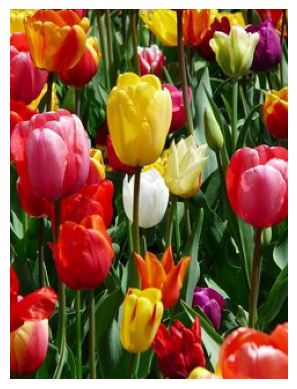

In [4]:
# Display the photo and its shape
print(img.shape)
plt.imshow(img)
plt.axis('off');

The tulip image is a 320 by 240 pixel array. Each pixel is represented by three color channels: red, green, and blue (320, 240, 3).

The third dimension refers to the values that encode the color of each pixel. Each pixel has 3 parameters: red (R), green (G), and blue (B) (the RGB values). For each color, the encoded value can range from 0-255. This means that there are 256<sup>3</sup>, or 16,777,216 different combinations of RGB, each resulting in a unique color on a screen.

To prepare the data for our model, we'll transform the image into a numerical array where each row corresponds to a pixel's red, green, and blue values.

In [5]:
# Reshape the image so that each row represents a single pixel 
# defined by three values: R, G, B
img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
img_flat[:5, :]

array([[211, 196,  41],
       [199, 180,  24],
       [179, 152,   0],
       [186, 150,   0],
       [187, 143,   0]], dtype=uint8)

In [6]:
img_flat.shape

(76800, 3)

#### Visualize the data in 3D

With 76,800 pixels, each defined by three color values (RGB), we can plot our data in a 3D space. To simplify analysis, let's convert it to a DataFrame.

In [7]:
# Create a df of the array with r, g, and b as columns
img_flat_df = pd.DataFrame(img_flat, columns = ['r', 'g', 'b'])
img_flat_df.head()

,r,g,b
0,211,196,41
1,199,180,24
2,179,152,0
3,186,150,0
4,187,143,0


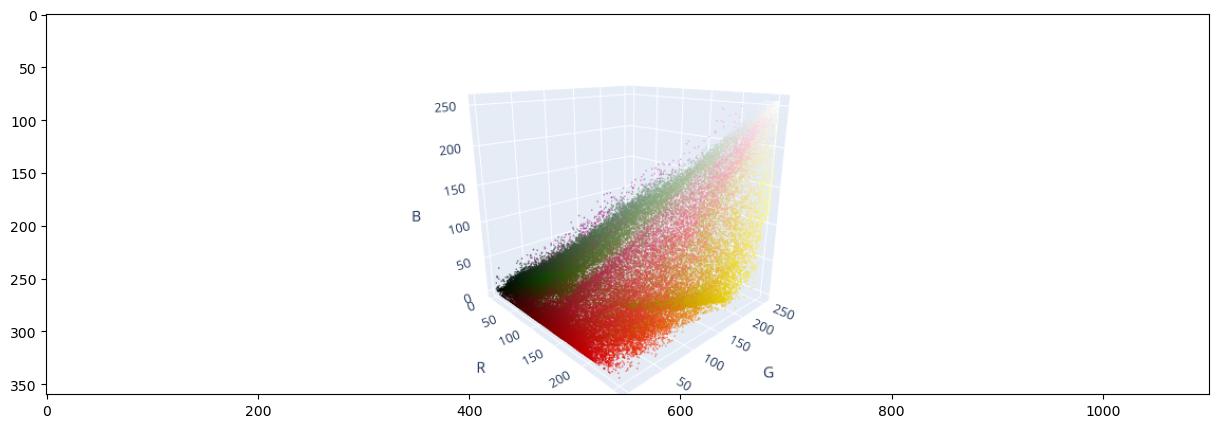

In [8]:
# Create 3D plot where each pixel in the `img` is displayed in its actual color
trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=['rgb({},{},{})'.format(r,g,b) for r,g,b 
                                        in zip(img_flat_df.r.values, 
                                               img_flat_df.g.values, 
                                               img_flat_df.b.values)],
                                 opacity=0.5))

data = [trace]

layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0),
                               )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )

#commented out, will not display on github due to size
#displaying a screenshot instead
#fig.show()
dplot = plt.imread('images/3D_plot_tulips.png')
plt.figure(figsize = (15,5))
plt.imshow(dplot)

Each dot on this interactive 3D plot represents a pixel from the tulip image. Color intensity indicates pixel frequency, with reds, greens, and yellows dominating.

This data will be used to train the model.

## Part 2: Model Building and Evaluation

#### Fit with *k* = 1

Experiment: *k* = 1

In [9]:
# Instantiate the model
kmeans = KMeans(n_clusters=1, random_state=42).fit(img_flat)

In [10]:
# Copy `img_flat` so we can modify it
img_flat1 = img_flat.copy()

# Replace each row in the original image with its closest cluster center
for i in np.unique(kmeans.labels_):
    img_flat1[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
    
img_flat1.shape

(76800, 3)

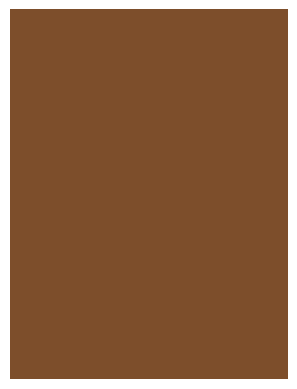

In [11]:
# Reshaping the data back to its original dimensions is necessary to display the image using plt.imshow(). 
# imshow() expects image data in the standard format (height, width, channels).
img1 = img_flat1.reshape(img.shape)

plt.imshow(img1)
plt.axis('off');

With one centroid specified, the model performed the following:
- Initialization: We randomly select a starting point (centroid) to represent the cluster.
- Assignment: Every pixel in the image is assigned to this single cluster since it's the only one available.
- Update: The centroid's position is recalculated as the average of all pixel colors.
- Convergence: In this case, the algorithm converges after just one iteration because there's no change in the centroid's position.


We replaced every pixel (df row) with the average color of the image, resulting in a brown, uniform picture.

In [12]:
img1

array([[[125,  78,  43],
        [125,  78,  43],
        [125,  78,  43],
        ...,
        [125,  78,  43],
        [125,  78,  43],
        [125,  78,  43]],

       [[125,  78,  43],
        [125,  78,  43],
        [125,  78,  43],
        ...,
        [125,  78,  43],
        [125,  78,  43],
        [125,  78,  43]],

       [[125,  78,  43],
        [125,  78,  43],
        [125,  78,  43],
        ...,
        [125,  78,  43],
        [125,  78,  43],
        [125,  78,  43]],

       ...,

       [[125,  78,  43],
        [125,  78,  43],
        [125,  78,  43],
        ...,
        [125,  78,  43],
        [125,  78,  43],
        [125,  78,  43]],

       [[125,  78,  43],
        [125,  78,  43],
        [125,  78,  43],
        ...,
        [125,  78,  43],
        [125,  78,  43],
        [125,  78,  43]],

       [[125,  78,  43],
        [125,  78,  43],
        [125,  78,  43],
        ...,
        [125,  78,  43],
        [125,  78,  43],
        [125,  78,  43]]

We can verify and compare the mean values from the original array to the cluster centers from the model:

In [13]:
# Calculate mean of each column in the original array
# will verify that this gave us the mean values

column_means = img_flat.mean(axis=0)

print('column means: ', column_means)

column means:  [125.64397135  78.93165365  43.51584635]


In [14]:
print('cluster centers: ', kmeans.cluster_centers_)

cluster centers:  [[125.64397135  78.93165365  43.51584635]]


#### Visualize the mean data point (color) with *k* = 1

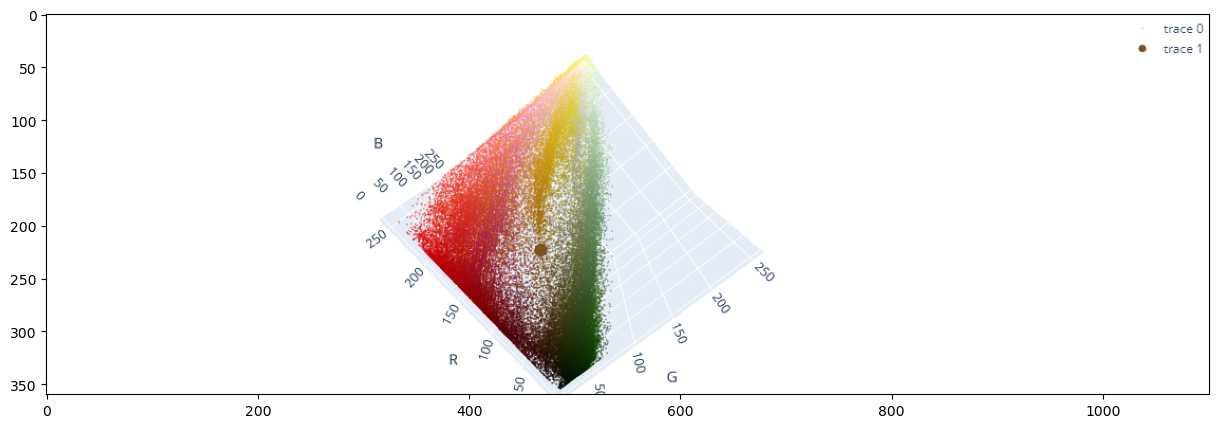

In [15]:
# Create 3-D plot where each pixel in the `img` is displayed in its actual color
trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=['rgb({},{},{})'.format(r,g,b) for 
                                        r,g,b in zip(img_flat_df.r.values, 
                                                     img_flat_df.g.values, 
                                                     img_flat_df.b.values)],
                                 opacity=0.5))

data = [trace]

layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0))

fig = go.Figure(data=data, layout=layout)


# Add centroid to chart
centroid = kmeans.cluster_centers_[0].tolist()

fig.add_trace(
    go.Scatter3d(x = [centroid[0]],
                 y = [centroid[1]],
                 z = [centroid[2]],
                 mode='markers',
                 marker=dict(size=7,
                             color=['rgb(125.79706706,78.8178776,42.58090169)'],
                             opacity=1))
)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )

#commented out, will not display on github due to size
#displaying a screenshot instead
#fig.show()
dplot_k1 = plt.imread('images/3D_plot_tulips_k1.png')
plt.figure(figsize = (15,5))
plt.imshow(dplot_k1)

You can see that the "center of gravity" (circle) of all points matches the average RGB color identified when *k*=1.

No more experimenting.  Cluster the data: *k* = 3

In [16]:
# Instantiate k-means model for 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(img_flat)

# Check the unique values of what's returned by the .labels_ attribute 
np.unique(kmeans3.labels_)

array([0, 1, 2])

Use these coordinates as we did previously to generate the colors that are represented by our centroids:

In [17]:
# Assign centroid coordinates to `centers` variable
centers = kmeans3.cluster_centers_
centers

array([[202.39763431, 174.37038195, 110.68386223],
       [ 40.83604502,  50.50578017,  16.27870206],
       [177.83256393,  42.71891935,  27.52205853]])

Let's visualize the model's centroids as color swatches using a helper function:

In [18]:
# Helper function that creates color swatches
def show_swatch(RGB_value):
    '''
    Takes in an RGB value and outputs a color swatch
    '''
    R, G, B = RGB_value
    rgb = [[np.array([R,G,B]).astype('uint8')]]
    plt.figure()
    plt.imshow(rgb)
    plt.axis('off');

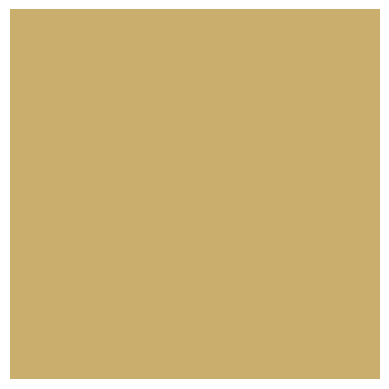

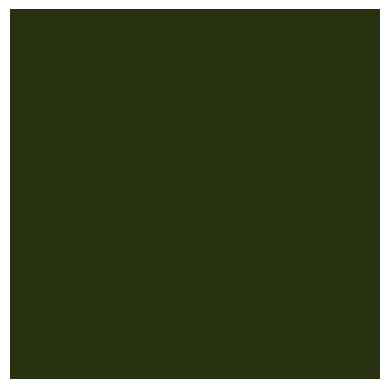

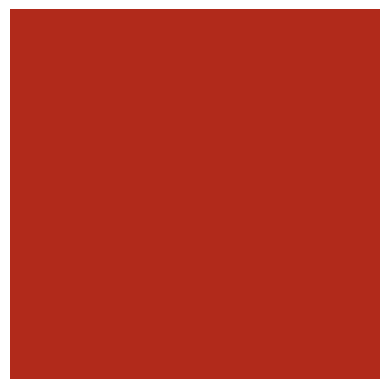

In [19]:
# Display the color swatches from the centers array
for pixel in centers:
    show_swatch(pixel)

Rinse and repeat: Replace each pixel with its assigned cluster's centroid color.

In [20]:
# Helper function to display our photograph when clustered into k clusters
def cluster_image(k, img=img):
    '''
    Fits a K-means model to a photograph.
    Replaces photo's pixels with RGB values of model's centroids.
    Displays the updated image.

    Args:
      k:    (int)          - Your selected K-value
      img:  (numpy array)  - Your original image converted to a numpy array

    Returns:
      The output of plt.imshow(new_img), where new_img is a new numpy array
      where each row of the original array has been replaced with the
      coordinates of its nearest centroid.
    '''

    img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(img_flat)
    new_img = img_flat.copy()
  
    for i in np.unique(kmeans.labels_):
        new_img[kmeans.labels_ == i, :] = kmeans.cluster_centers_[i]
  
    new_img = new_img.reshape(img.shape)

    return plt.imshow(new_img), plt.axis('off');
  

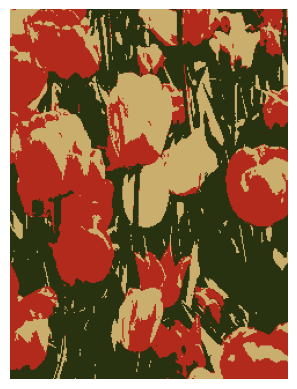

In [21]:
# Generate image when k=3
cluster_image(3);

The image now displays only three colors, determined by the nearest centroids.



#### Fit and visualize the mean data points (colors) with *k* = 3

In [22]:
# Just to get an understanding of what the data structures look like
print(kmeans3.labels_.shape)
print(kmeans3.labels_)
print(np.unique(kmeans3.labels_))
print(kmeans3.cluster_centers_)

(76800,)
[0 0 2 ... 2 2 2]
[0 1 2]
[[202.39763431 174.37038195 110.68386223]
 [ 40.83604502  50.50578017  16.27870206]
 [177.83256393  42.71891935  27.52205853]]


In [23]:
# Create a new column in the df that indicates the cluster number of each row 
# (as assigned by k-means for k=3)
img_flat_df['cluster'] = kmeans3.labels_
img_flat_df.head()

,r,g,b,cluster
0,211,196,41,0
1,199,180,24,0
2,179,152,0,2
3,186,150,0,2
4,187,143,0,2


In [24]:
# Create helper dictionary to map RGB color values to each observation in df
series_conversion = {0: 'rgb' +str(tuple(kmeans3.cluster_centers_[0])),
                     1: 'rgb' +str(tuple(kmeans3.cluster_centers_[1])),
                     2: 'rgb' +str(tuple(kmeans3.cluster_centers_[2])),
                     }
series_conversion

{0: 'rgb(202.3976343077475, 174.37038194988085, 110.68386222708249)',
 1: 'rgb(40.836045018051905, 50.50578017004541, 16.278702061287202)',
 2: 'rgb(177.83256392757693, 42.71891935289948, 27.52205852835872)'}

In [25]:
# Replace the cluster numbers in the 'cluster' col with formatted RGB values 
# (made ready for plotting)
img_flat_df['cluster'] = img_flat_df['cluster'].map(series_conversion)
img_flat_df.head()

,r,g,b,cluster
0,211,196,41,"rgb(202.3976343077475, 174.37038194988085, 110..."
1,199,180,24,"rgb(202.3976343077475, 174.37038194988085, 110..."
2,179,152,0,"rgb(177.83256392757693, 42.71891935289948, 27...."
3,186,150,0,"rgb(177.83256392757693, 42.71891935289948, 27...."
4,187,143,0,"rgb(177.83256392757693, 42.71891935289948, 27...."


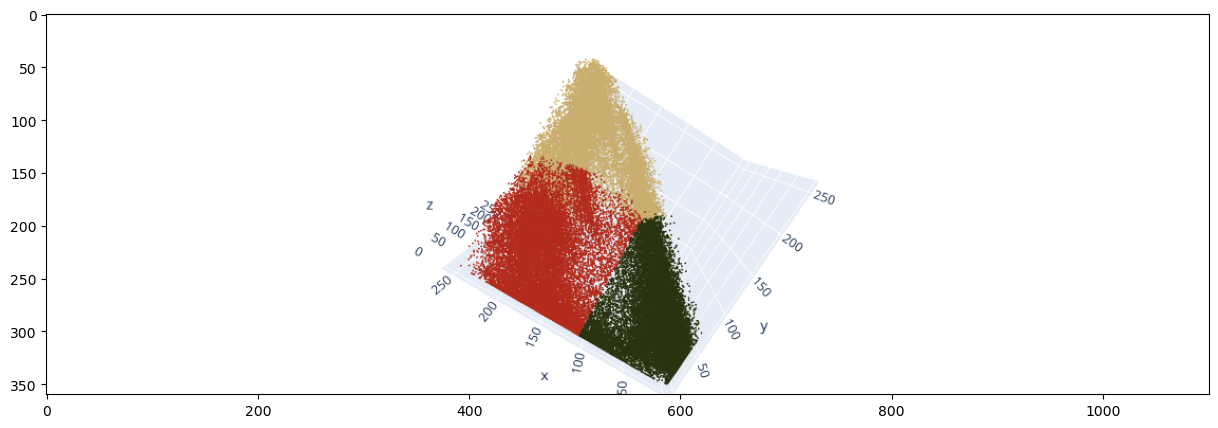

In [26]:
# Replot the data, now showing which cluster (i.e., color) it was assigned to by K-means when k=3
trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=img_flat_df.cluster,
                                 opacity=1))

data = trace

layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0))

fig = go.Figure(data=data, layout=layout)

#commented out, will not display on github due to size
#displaying a screenshot instead
#fig.show()
dplot_k3 = plt.imread('images/3D_plot_tulips_k3.png')
plt.figure(figsize = (15,5))
plt.imshow(dplot_k3)

The colors we ended up with don't really match what we saw in the original plot, in my view. The data points of the original are more spread out in long lines than in tight groups, which is what K-means usually looks for. While it's not wrong (there's no such thing as "wrong" clustering), there might be better ways to group the colors. Even though K-means successfully compressed the colors of this photograph, we could try a different value of *k* if we want to capture those long color streaks.

#### Fit and visualize the mean data points (colors) with *k* = 2-10

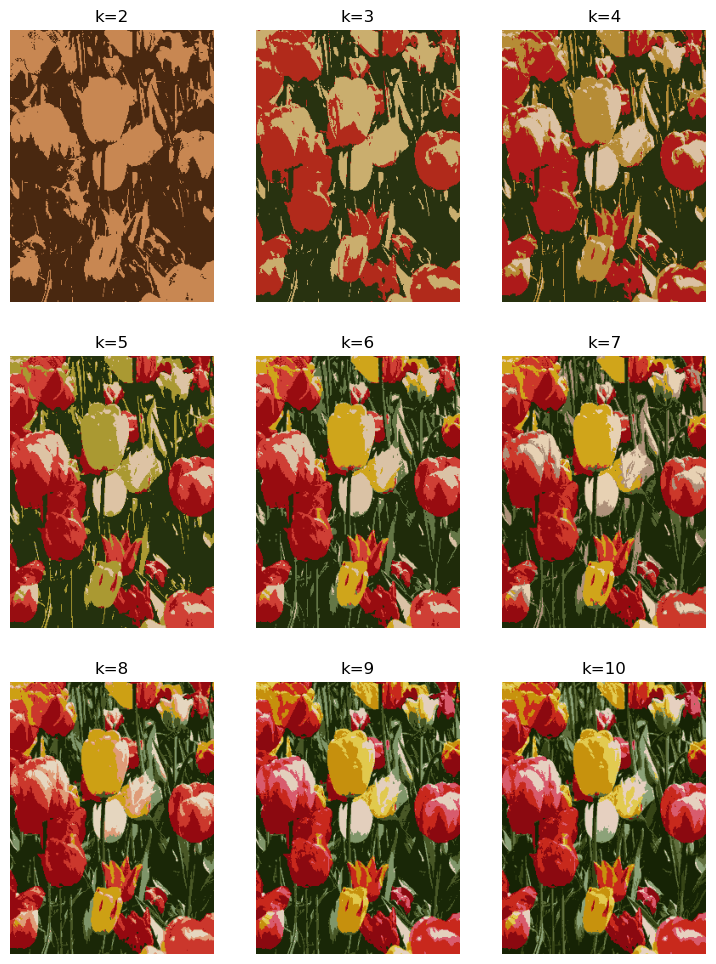

In [27]:
# Helper function to plot image grid
def cluster_image_grid(k, ax, img=img):
    '''
    Fits a K-means model to a photograph.
    Replaces photo's pixels with RGB values of model's centroids.
    Displays the updated image on an axis of a figure.

    Args:
      k:    (int)          - Your selected K-value
      ax:   (int)          - Index of the axis of the figure to plot to
      img:  (numpy array)  - Your original image converted to a numpy array

    Returns:
      A new image where each row of img's array has been replaced with the 
      coordinates of its nearest centroid. Image is assigned to an axis that 
      can be used in an image grid figure.
    '''
    img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(img_flat)
    new_img = img_flat.copy()

    for i in np.unique(kmeans.labels_):
        new_img[kmeans.labels_==i, :] = kmeans.cluster_centers_[i]

    new_img = new_img.reshape(img.shape)
    ax.imshow(new_img)
    ax.axis('off')

fig, axs = plt.subplots(3, 3)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(9, 12)
axs = axs.flatten()
k_values = np.arange(2, 11)
for i, k in enumerate(k_values):
    cluster_image_grid(k, axs[i], img=img)
    axs[i].title.set_text('k=' + str(k))

It's getting harder to tell the difference between the images as we add more colors. This happens with any type of data, not just pictures. Once you have a certain number of groups, adding more doesn’t give you much new information.  For me, the marginal benefit of increasing *k* beyond six is negligible.